In [2]:
import numpy as np 
import pandas as pd 
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

df_anime2014 = pd.read_csv('anime.csv', na_values = ['unknown'])
print(df_anime2014.isnull().sum()/len(df_anime2014)*100)
print(f"Total number of records: {len(df_anime2014)}")

anime_id    0.000000
name        0.000000
genre       0.504311
type        0.203351
episodes    0.000000
rating      1.870831
members     0.000000
dtype: float64
Total number of records: 12294


Find out what is in the dataframe

In [3]:
df_anime2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
anime = df_anime2014[df_anime2014.genre.notnull()][['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']]
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
#sort values to check popularity
#Calculating the top 100 Animes
anime_rank_100 = anime.sort_values(by='rating').head(100).loc[:,['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']]
anime_rank_100

,anime_id,name,genre,type,episodes,rating,members
9991,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51
12258,20007,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,1,1.92,129
8058,3287,Tenkuu Danzai Skelter+Heaven,"Mecha, Sci-Fi",OVA,1,2.00,7680
8057,13405,Utsu Musume Sayuri,"Comedy, Dementia",OVA,1,2.14,4047
8056,413,Hametsu no Mars,"Horror, Sci-Fi",OVA,1,2.37,27557
...,...,...,...,...,...,...,...
10482,30971,Tanita Shokudou,Slice of Life,Special,1,3.54,65
10184,33906,Shangri-La (Music),Music,Music,1,3.54,55
10888,30090,Zombie Ehon,Comedy,ONA,1,3.54,86
9037,32092,Juicy Jungle,"Music, Sci-Fi",Music,1,3.56,63


In [6]:
#Goal: make a word graph with the most popular animes
#list the top 100 by name and rating
df_title = anime_rank_100['name'].astype("str").tolist()
df_rank = anime_rank_100['rating'].astype("int32").tolist()

list_popularity_and_rank_100 = []

for i in range(0, len(df_rank)):
    for j in range(0, df_rank[i]):
        list_popularity_and_rank_100.append(df_title[i])

list_popularity_and_rank_100[-10:]

['Shangri-La (Music)',
 'Zombie Ehon',
 'Zombie Ehon',
 'Zombie Ehon',
 'Juicy Jungle',
 'Juicy Jungle',
 'Juicy Jungle',
 'Gold Pencil And Alien Boy',
 'Gold Pencil And Alien Boy',
 'Gold Pencil And Alien Boy']

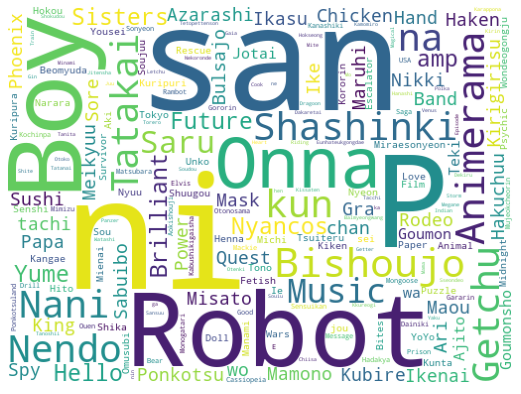

In [7]:
plt.subplots(figsize=(14,7))
wordcloud = WordCloud( collocations=False, background_color='white', width=512,
                     height=384).generate(" ".join(list_popularity_and_rank_100))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [8]:
#Compare anime genre popularity in 2014
anime_genre = anime.genre
genre_list = []
genre_splited = []
for i in anime_genre.index:
    for j in anime_genre[i].split(", "):
        genre_splited.append(j)
        if j not in genre_list:
            genre_list.append(j)
genre_splited[0:6]

['Drama', 'Romance', 'School', 'Supernatural', 'Action', 'Adventure']

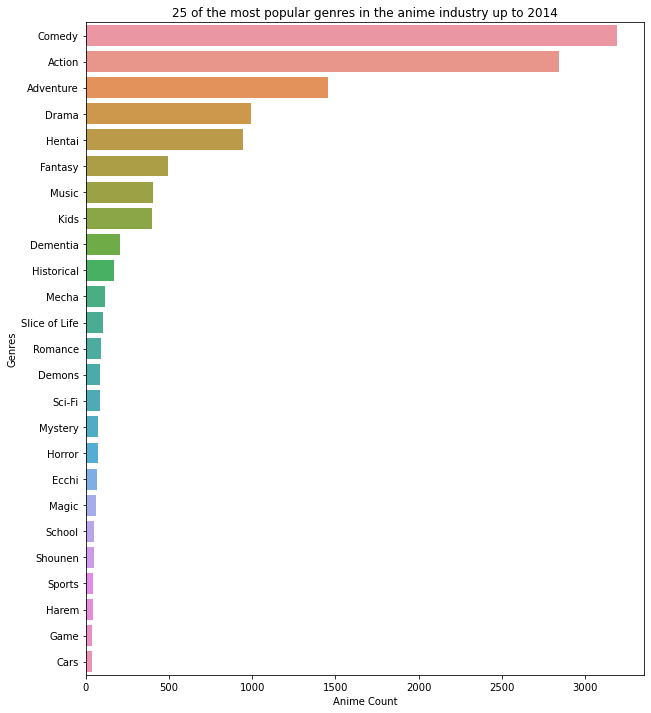

In [10]:
genre_firsts = []
for i in anime_genre.index:
    genre_firsts.append(anime_genre[i].split(", ")[0])
    
anime_genres_firsts = pd.Series(genre_firsts).value_counts()

plt.figure(figsize=(10, 12))
sns.barplot(x=anime_genres_firsts[0:25].tolist(), y=anime_genres_firsts[0:25].index.tolist())
plt.xlabel('Anime Count')
plt.ylabel('Genres')
plt.title('25 of the most popular genres in the anime industry up to 2014')
plt.show()